In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df=pd.read_csv('covid_19_data.csv')
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9112,9113,03/26/2020,Wyoming,US,2020-03-26 23:53:24,53.0,0.0,0.0
9113,9114,03/26/2020,Xinjiang,Mainland China,2020-03-26 23:53:24,76.0,3.0,73.0
9114,9115,03/26/2020,Yukon,Canada,2020-03-26 23:53:24,3.0,0.0,0.0
9115,9116,03/26/2020,Yunnan,Mainland China,2020-03-26 23:53:24,178.0,2.0,172.0


In [2]:
df. shape

(9117, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              9117 non-null   int64  
 1   ObservationDate  9117 non-null   object 
 2   Province/State   5029 non-null   object 
 3   Country/Region   9117 non-null   object 
 4   Last Update      9117 non-null   object 
 5   Confirmed        9117 non-null   float64
 6   Deaths           9117 non-null   float64
 7   Recovered        9117 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 569.9+ KB


In [4]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

In [15]:
from datetime import date


china=df.loc[df['Country/Region']=='Mainland China']
china['date'] = china['ObservationDate'].dt.date
china['date']=pd.to_datetime(china['date'])
china = china[china['date'] > pd.Timestamp(date(2020,1,22))]
china=china.groupby('date')["Confirmed", "Recovered", "Deaths"].sum().reset_index()
china

,date,Confirmed,Recovered,Deaths
0,2020-01-23,639,30,18
1,2020-01-24,916,36,26
2,2020-01-25,1399,39,42
3,2020-01-26,2062,49,56
4,2020-01-27,2863,58,82
...,...,...,...,...
59,2020-03-22,81060,72252,3261
60,2020-03-23,81116,72709,3270
61,2020-03-24,81180,73169,3277
62,2020-03-25,81221,73661,3281


In [17]:
china['new cases'] = china['Confirmed'].sub(china['Confirmed'].shift())
china['new cases'].iloc[0] = china['Confirmed'].iloc[0]
china

,date,Confirmed,Recovered,Deaths,new cases
0,2020-01-23,639,30,18,639.0
1,2020-01-24,916,36,26,277.0
2,2020-01-25,1399,39,42,483.0
3,2020-01-26,2062,49,56,663.0
4,2020-01-27,2863,58,82,801.0
...,...,...,...,...,...
59,2020-03-22,81060,72252,3261,46.0
60,2020-03-23,81116,72709,3270,56.0
61,2020-03-24,81180,73169,3277,64.0
62,2020-03-25,81221,73661,3281,41.0


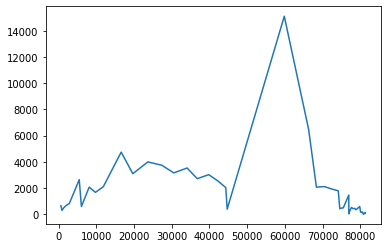

In [31]:
plt.plot(china['Confirmed'], china['new cases'])